# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Helper Functions

In [2]:
def train_model_and_evaluate(df):
  # Store the salary column as the target vector (Y), and the remaning columns as the sample vector (X)
  X = np.array(df.loc[:, df.columns != 'Salary'])
  y = np.array(df['Salary'])

  # Use a 80% train set, 10% validation set, and 10% test dataset split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  X_test, X_cv, y_test, y_cv = train_test_split(X_train, y_train, test_size=0.5)

  # Run a linear regression on the data using the scikit-learn library
  reg = linear_model.LinearRegression()
  reg.fit(X_train, y_train)

  # Make predictions using the testing set
  y_pred = reg.predict(X_test)

  # Evaluate the model's performance
  mse = mean_squared_error(y_test, y_pred)
  print("Mean squared error: %.2f" % mse)
  print("Root mean squared error: %.2f" % np.sqrt(mse))
  print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


def display_heat_map(df):
  # Show a heat map of the dataframe to understand the correlation between different features
  sb.heatmap(df.corr())
  plt.show()

# Obtain the csv data

Use the pandas read_csv() function to convert the csv data into a dataframe

In [3]:
dataset_link = './Salary Data.csv'
df = pd.read_csv(dataset_link)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


# Perform Data Preprocessing Steps.

Drop rows with empty values, drop rows with NaN values

In [4]:
# Drop duplicate values except for the first instance
df = df.drop_duplicates()
# Drop NaN values from the dataset, and check all columns
df = df.dropna(subset=["Age","Gender","Education Level","Job Title","Years of Experience","Salary"])
# Only use columns with a salary greater than 0
df = df[df['Salary'] > 0]

# Display the dataset information after preprocessing
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


# Visualize the Data

<Axes: xlabel='Age', ylabel='Salary'>

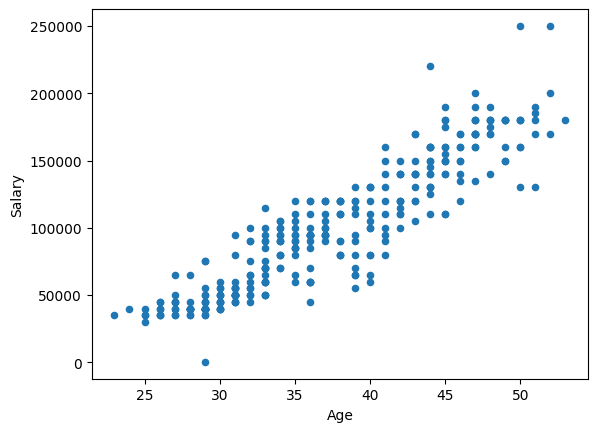

In [5]:
df.plot.scatter("Age", "Salary")

In [6]:
age_distribution = px.histogram(df, x="Age")
age_distribution.show()

<Axes: xlabel='Gender', ylabel='Salary'>

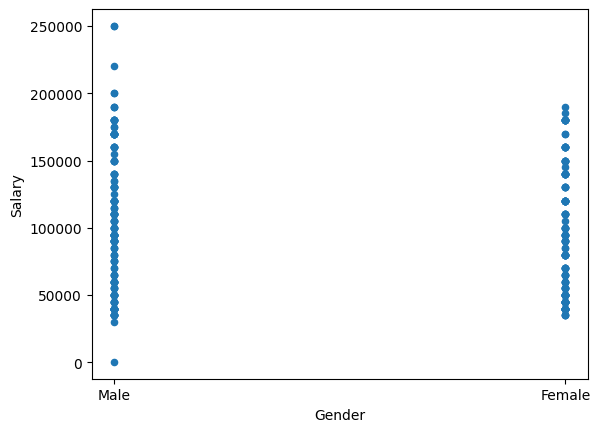

In [7]:
df.plot.scatter("Gender", "Salary")

In [8]:
gender_count = df['Gender'].value_counts().reset_index()
gender_distribution = px.pie(gender_count, values='count', names="Gender", title="Gender Proportion")
gender_distribution.show()

<Axes: xlabel='Education Level', ylabel='Salary'>

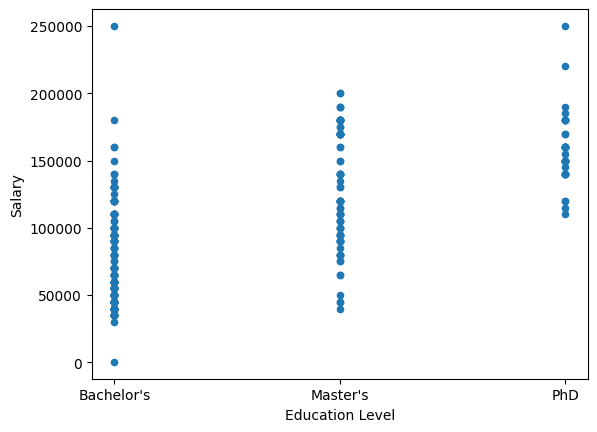

In [9]:
df.plot.scatter("Education Level", "Salary")

In [10]:
education_count = df['Education Level'].value_counts().reset_index()
education_distribution = px.pie(education_count, values='count', names="Education Level", title="Highest Level of Education by Degree")
education_distribution.show()

<Axes: xlabel='Job Title', ylabel='Salary'>

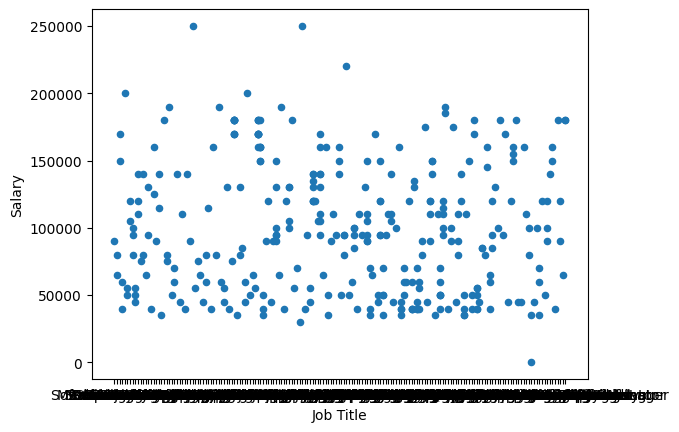

In [11]:
df.plot.scatter("Job Title", "Salary")

In [12]:
job_title_count = df['Job Title'].value_counts().reset_index()
job_title_distribution = px.pie(job_title_count, values='count', names="Job Title", title="Job Title")
job_title_distribution.show()

<Axes: xlabel='Years of Experience', ylabel='Salary'>

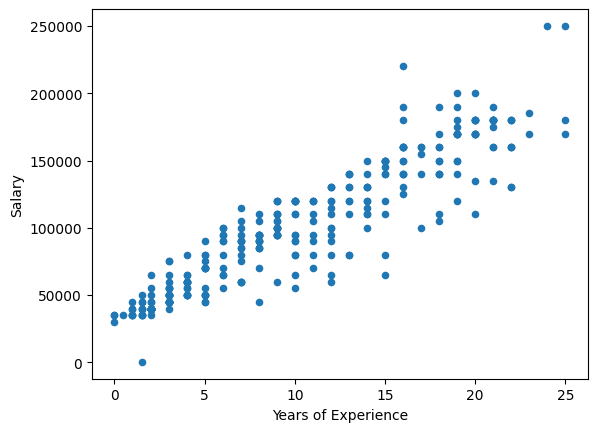

In [13]:
df.plot.scatter("Years of Experience", "Salary")

In [14]:
years_of_experience_distribution = px.histogram(df, x="Years of Experience")
years_of_experience_distribution.show()

In [15]:
salary_distribution = px.histogram(df, x="Salary")
salary_distribution.show()

# One Hot Encode the dataset

get_dummies() will automatically one hot encode the object, string, and category data types. This will convert the Gender, Education Level, and Job Title columns in the dataset.

In [16]:
one_hot_encoded_df = pd.get_dummies(df)
print(one_hot_encoded_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Columns: 182 entries, Age to Job Title_Web Developer
dtypes: bool(179), float64(3)
memory usage: 66.8 KB
None


In [17]:
# Display the first 5 rows of the one hot encoded dataframe
one_hot_encoded_df.head()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Display the last 5 rows of the one hot encoded dataframe
one_hot_encoded_df.tail()

,Age,Years of Experience,Salary,Gender_Female,Gender_Male,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_Account Manager,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
348,28.0,1.0,35000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
349,36.0,8.0,110000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
350,44.0,16.0,160000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
351,31.0,3.0,55000.0,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
371,43.0,19.0,170000.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


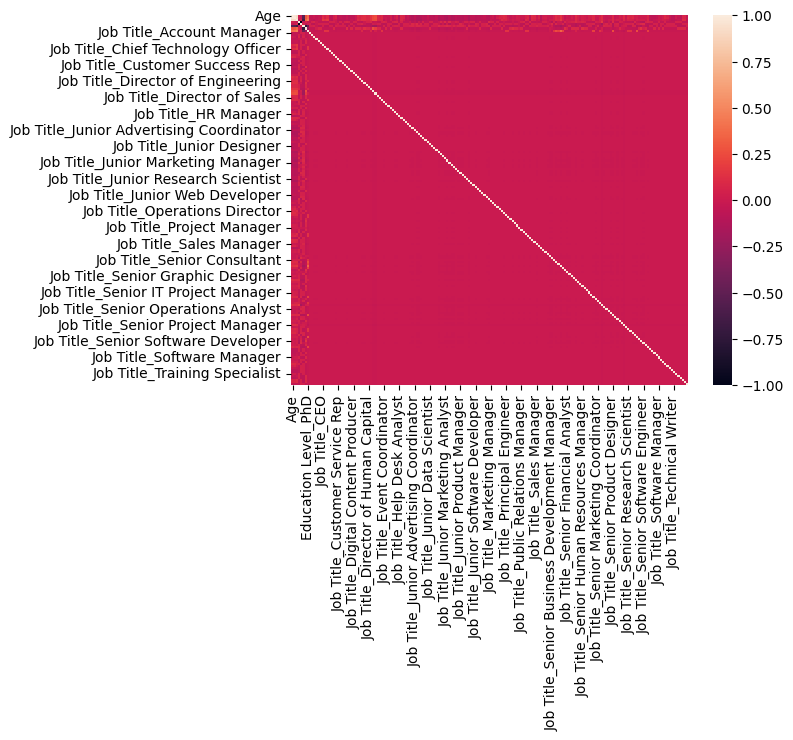

In [19]:
display_heat_map(one_hot_encoded_df)

# Label Encode the Dataset

Label encode all categorical data columns

In [20]:
le = LabelEncoder()

# Encode labels in column 'Gender'.
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].unique()

# Encode labels in column 'Gender'.
df['Education Level'] = le.fit_transform(df['Education Level'])
df['Education Level'].unique()

# Encode labels in column 'Gender'.
df['Job Title'] = le.fit_transform(df['Job Title'])
df['Job Title'].unique()

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 167,  39,  95,  16, 103,
       169,  88,  85,   2, 162,  10,   0,  29,  41,  12,   5,  34, 171,
        38, 170, 156,  30, 115,  47,  21,  43,  14,   4, 118, 173,  99,
       166,  11, 153,  42,   9, 165, 106,   8,  56,  35,  46, 144,  91,
       164, 134, 168, 100,  76,  97,  87,  94, 122,  80, 143,   7,  20,
        45, 131,  15, 120, 161, 163, 110,  62,  86,  90,  61, 141,  66,
       121, 105, 152,  79, 154, 146,  73,  64,  54, 142,  49, 148,  65,
        70, 109,  32,  71, 111, 139,  53, 129,  59, 138,  28,  77, 149,
        31,  52, 132, 125,  50, 108, 147,  60,  25,  63,  55, 136, 124,
       155,  69, 135, 128, 145,  33, 107,  23,  74, 126, 113,  27,  48,
        78, 133, 127, 117,  51,  75, 140,  68, 151,  72, 119, 123, 114,
        67,  26, 137,  58,  24])

In [21]:
# Display the first 5 rows of the label encoded dataframe
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [22]:
# Display the last 5 rows of the label encoded dataframe
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0
371,43.0,1,1,30,19.0,170000.0


# Perform feature selection on the dataset

The heatmap shows that Age and Years of Experience are closely related, so Age will be dropped and only Years of Experience will be used.

In [23]:
no_age_df = df.drop(columns=["Age"])

In [24]:
print(no_age_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               324 non-null    int64  
 1   Education Level      324 non-null    int64  
 2   Job Title            324 non-null    int64  
 3   Years of Experience  324 non-null    float64
 4   Salary               324 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 15.2 KB
None


# Compare the performance of linear regression model with different preprocessing steps applied

In [25]:
print("Performance of model with one hot encoded preprocessing")
train_model_and_evaluate(one_hot_encoded_df)

Performance of model with one hot encoded preprocessing
Mean squared error: 26565807.87
Root mean squared error: 5154.20
Coefficient of determination: 0.99


In [26]:
print("Performance of model with label encoding preprocessing")
train_model_and_evaluate(df)

Performance of model with label encoding preprocessing
Mean squared error: 295234245.96
Root mean squared error: 17182.38
Coefficient of determination: 0.87


In [27]:
print("Performance of model with label encoding preprocessing and age feature dropped")
train_model_and_evaluate(no_age_df)

Performance of model with label encoding preprocessing and age feature dropped
Mean squared error: 297795374.11
Root mean squared error: 17256.75
Coefficient of determination: 0.89
